In [85]:

import osmnx as ox


import matplotlib.pyplot as plt

import networkx as nx

import pandas as pd

import numpy as np

import matplotlib.cm as cm

import csv


from shapely import geometry

import os
cwd = os.getcwd()
caches = ['/data/cache/footprints_building/Westland.pickle','/data/cache/footprints_landuse/Westland.pickle','/data/cache/graph_raw/Westland.pickle']
# buildings_gdf = pd.read_pickle(cwd+caches[0])
# landuse_gdf = pd.read_pickle(cwd+caches[1])
# G = nx.read_gpickle(cwd+caches[2])

# buildings_gdf.plot()

# fig, ax = ox.plot_graph(G, edge_linewidth=0)

# wl = ox.geocode_to_gdf('Westland, Zuid-Holland, The Netherlands')



/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-125-e56ee2c98554>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ct = wl.centroid


3
2
2
2
2
2
3


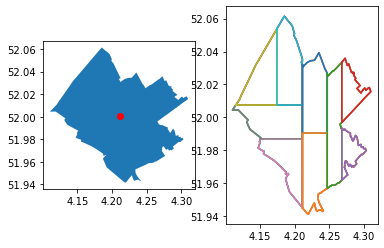

In [125]:
from shapely.ops import split
import geopandas as gpd


fig,ax=plt.subplots(1,2)
gdf = wl['geometry'].to_crs({'proj':'cea'}) 
wl.plot(ax=ax[0])
ct = wl.centroid
ax[0].plot(ct[0].xy[0],ct[0].xy[1],'ro')

area = gdf.area/10**6

def split_in_half(geom,vert=True):
    ct = geom.centroid   
    xmin,ymin,xmax,ymax=geom.bounds
    ctx=ct.xy[0][0]
    cty=ct.xy[1][0]
    if vert:
        c = [(ctx,ymin),(ctx,ymax)]
    else:
        c = [(xmin,cty),(xmax,cty)]
    line = geometry.LineString(c)
    geom_collect = split(geom,line)
    return geom_collect
    

# xmin,ymin,xmax,ymax=wl.geometry[0].bounds
# ctx=ct[0].xy[0][0]
# cty=ct[0].xy[1][0]
# c = [(ctx,ymin),(ctx,ymax)]
# line1 = geometry.LineString(c)
# ax[0].plot(line1.xy[0],line1.xy[1],'r')

# g = split(wl.geometry[0],line)


[g1,g2,ct] = split_in_half(wl.geometry[0])
g=[g1,g2]
i=1
small_geometries = []
while len(g)>0:
    x,y=g[0].exterior.xy
    ax[1].plot(x,y)
    gd = gpd.GeoDataFrame(['g[0]'],geometry=[g[0]],crs="EPSG:4326").to_crs({'proj':'cea'}) 
    area=gd.geometry[0].area/10**6
    if area > 15:
        vert=True
        if i%2==1:
            vert=False
        geom_collect = split_in_half(g[0],vert=vert)
        for ge in geom_collect:
            g.append(ge)
    else:
#         print(i)
        small_geometries.append(g[0])

    g=g[1:]

    i+=1
  



/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


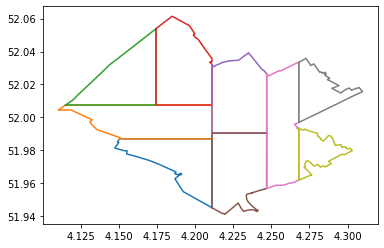

In [126]:
fig,ax=plt.subplots()
for geom in small_geometries:
    x,y=geom.exterior.xy
    ax.plot(x,y)

In [35]:
ox.config(timeout=10000)
import time

st = time.time()

ox.geometries.geometries_from_place('Westland, Zuid-Holland, The Netherlands',{'building':['residential','house','apartments']})

print('took {:.2f} seconds'.format(st-time.time()))

landuse = {'landuse':['farmland','meadow','orchard']}

took -194.44 seconds


In [2]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)


xmax = nodes.x.max()
xmin = nodes.x.min()
ymin = nodes.y.min()
ymax = nodes.y.max()



In [3]:





#%% coloring map areas (top 25 most frequent)

vcount = list(landuse_gdf.landuse.value_counts()[:25].index)
colors = {'village_green':'lightgreen','static_caravan':'yellow','water':'aqua',
            'road':'lightblue','mobile_home':'gray','building':'saddlebrown',
            'grass':'g','forest':'forestgreen','meadow':'lightgreen',
            'park':'palegreen','recreation_ground':'gold','commercial':'pink',
            'residential':'khaki','railway':'gray','retail':'fuchsia',
            'orchard':'darkgreen','allotments':'lightgray','industrial':'darkgray',
            'cemetery':'dimgray','farmland':'wheat','farmyard':'goldenrod',
            'paved':'rosybrown','construction':'indianred','reservoir':'lightblue',
            'depot':'gray','traffic_island':'brown','religious':'tan',
            'basin':'aqua','corral':'brown','greenhouse':'white','greenhouse_horticulture':'white'}

colormap = {}
for landuse in vcount:
    if landuse not in colors.keys():
        colormap[landuse] = 'indigo'
    else:
        colormap[landuse] = colors[landuse]
    

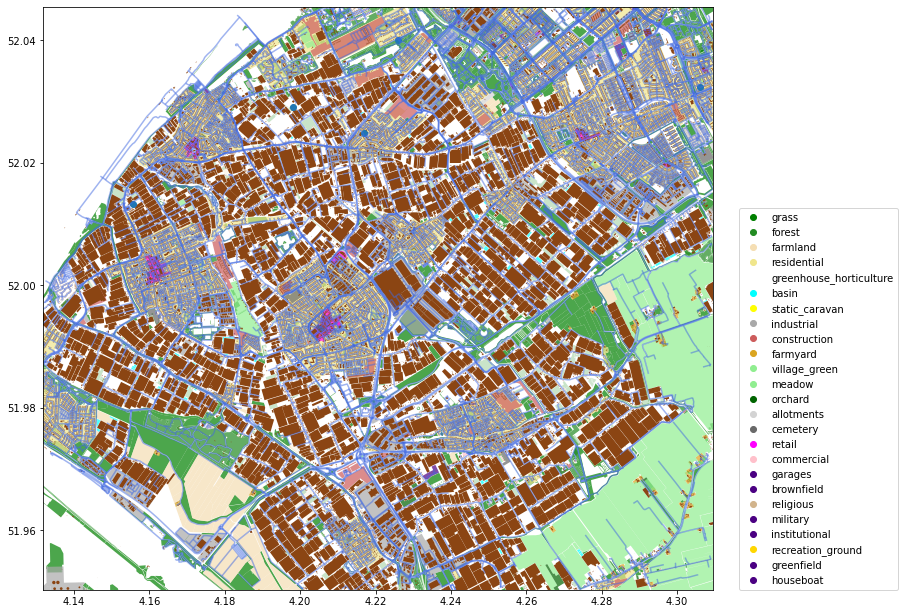

In [4]:
def plot_map(G,footpr,water,building,nodes,edges,vcount,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax):
    fig,ax=plt.subplots(figsize=(12,12))
    if len(footpr)>0:
        for i in range(0,len(vcount)):
            sub_footpr = footpr[footpr.landuse==vcount[i]]
            sub_footpr.plot(ax=ax,facecolor=colormap[vcount[i]], alpha=0.7,label=vcount[i])

    edges.plot(ax=ax,alpha=0.5,edgecolor='royalblue')
     
    if len(water)>0:
        water[water.natural=='water'].plot(ax=ax,edgecolor='aqua',facecolor='aqua', alpha=0.5)
    if len(building)>0:
        building.plot(ax=ax,facecolor='saddlebrown',alpha=1)

    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colormap.values()]
    plt.legend(markers, colormap.keys(), loc=(1.04,0),numpoints=1)
    plt.show()
    
plot_map(G,landuse_gdf,[],buildings_gdf,nodes,edges,vcount)



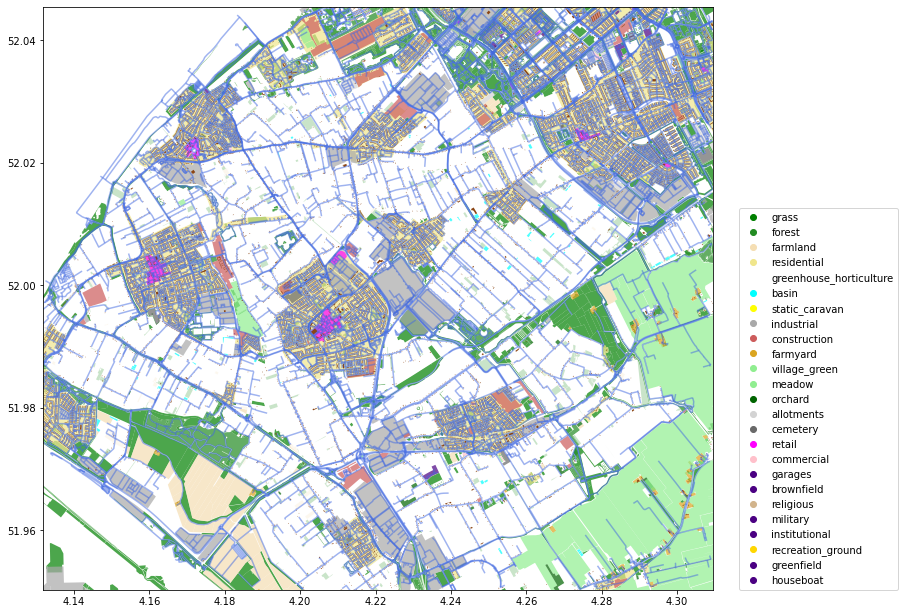

In [5]:
huishoudens = buildings_gdf[(buildings_gdf.building=='house') | (buildings_gdf.building == 'apartments')]

plot_map(G,landuse_gdf,[],huishoudens,nodes,edges,vcount)

In [6]:
orchards = landuse_gdf[landuse_gdf.landuse=='orchard']
orchards

,unique_id,osmid,element_type,geometry,source,barrier,name,traffic_sign,addr:city,addr:housenumber,...,fee,parking,construction,disused:building,military,orchard,leaf_cycle,leaf_type,ways,type
192,way/95689843,95689843,way,"POLYGON ((4.30493 52.03944, 4.30462 52.03987, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,way/95978694,95978694,way,"POLYGON ((4.24325 52.03475, 4.24307 52.03466, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,way/138158108,138158108,way,"POLYGON ((4.26128 51.99036, 4.26102 51.99053, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,way/138158312,138158312,way,"POLYGON ((4.22208 51.98976, 4.22195 51.98976, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410,way/138159233,138159233,way,"POLYGON ((4.28378 51.98670, 4.28417 51.98650, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,way/138159332,138159332,way,"POLYGON ((4.27380 51.97684, 4.27338 51.97720, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,way/138163469,138163469,way,"POLYGON ((4.25503 51.99731, 4.25410 51.99683, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,way/138579734,138579734,way,"POLYGON ((4.29109 51.96830, 4.29182 51.96865, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,way/138579927,138579927,way,"POLYGON ((4.29606 51.95690, 4.29590 51.95681, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,way/138581074,138581074,way,"POLYGON ((4.30253 51.96539, 4.30198 51.96581, ...",3dShapes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


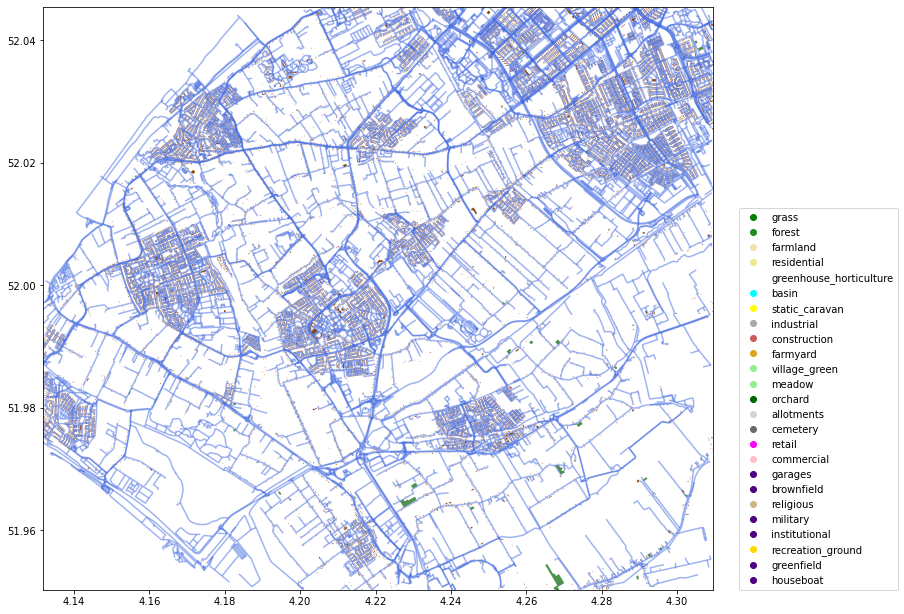

In [7]:

plot_map(G,orchards,[],huishoudens,nodes,edges,vcount)

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authori

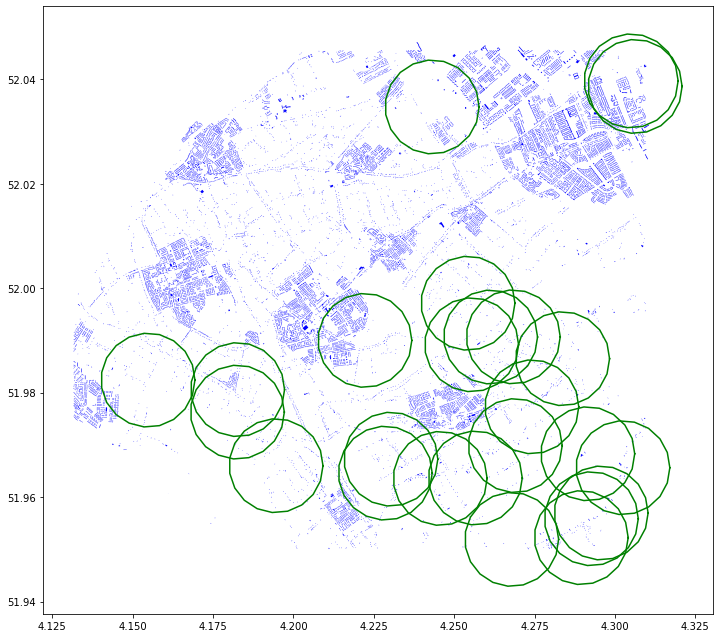

In [17]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(12,12))
huishoudens.plot(ax=ax,color='b')
locatie_buffers = []

for i,row in orchards.iterrows():
    centre = row.geometry.centroid
    
    n_points = 20
    d = 1000  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')
    locatie_buffers.append(buffer_poly)
    
    
    



In [18]:
intersected = pd.DataFrame(index=huishoudens.index)
for i,poly in enumerate(locatie_buffers):
    intersected['{}'.format(i)]=huishoudens['geometry'].apply(lambda geom: poly.intersects(geom))
    
    

In [19]:
print('{:.5f}% huishoudens covered by buffers'.format(intersected.any(axis='columns').sum()/len(huishoudens)*100))

17.06591% huishoudens covered by buffers


In [23]:
huishoudens

50387

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


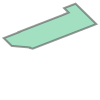

In [130]:
ox.geometries.geometries_from_address('Zuidpoolsingel 238, Alphen aan den Rijn',{'building':True},dist=10).iloc[0].geometry